# Load Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# Dataset

## Load Data

In [4]:
data_path = '../data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv'

In [5]:
df = pd.read_csv(data_path, na_values=-1)

## View data summary

In [6]:
# Check dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (61352, 20)


In [10]:
# Display the first few rows of the dataset
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2.0,46.0,8.0,3,0,0,0.0,0.0,0.0,9.0,1.0,9.0,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1.0,30.0,6.0,3,0,0,0.0,0.0,0.0,9.0,1.0,2.0,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2.0,58.0,9.0,3,0,0,0.0,0.0,0.0,9.0,1.0,10.0,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2.0,78.0,11.0,3,0,0,0.0,0.0,0.0,9.0,2.0,10.0,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1.0,63.0,9.0,3,0,0,0.0,0.0,0.0,9.0,3.0,7.0,W01000578


In [22]:
df.tail()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
61347,Unvalidated,2022461156711,2022,461156711,1,1,3,2.0,56.0,9.0,3,10,9,0.0,0.0,0.0,0.0,1.0,10.0,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,3,1.0,14.0,3.0,2,5,9,0.0,0.0,0.0,0.0,NaN,NaN,NaN
61349,Unvalidated,2022461157256,2022,461157256,2,1,1,1.0,42.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,5.0,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,1,2.0,40.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,3.0,E01024497
61351,Unvalidated,2022461159841,2022,461159841,2,1,1,1.0,71.0,10.0,3,0,0,0.0,0.0,0.0,9.0,1.0,2.0,E01016025


In [52]:
df[df['accident_index'] == '2022070154696']

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2.0,58.0,9.0,3,0,0,0.0,0.0,0.0,9.0,1.0,10.0,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2.0,78.0,11.0,3,0,0,0.0,0.0,0.0,9.0,2.0,10.0,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1.0,63.0,9.0,3,0,0,0.0,0.0,0.0,9.0,3.0,7.0,W01000578
5,Unvalidated,2022070154696,2022,070154696,4,4,1,1.0,52.0,8.0,3,0,0,0.0,0.0,0.0,9.0,1.0,9.0,E01012374
6,Unvalidated,2022070154696,2022,070154696,4,5,2,1.0,50.0,8.0,3,0,0,2.0,0.0,0.0,9.0,NaN,NaN,NaN
7,Unvalidated,2022070154696,2022,070154696,4,6,2,1.0,16.0,4.0,3,0,0,2.0,0.0,0.0,9.0,NaN,NaN,NaN


In [24]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status                              61352 non-null  object 
 1   accident_index                      61352 non-null  object 
 2   accident_year                       61352 non-null  int64  
 3   accident_reference                  61352 non-null  object 
 4   vehicle_reference                   61352 non-null  int64  
 5   casualty_reference                  61352 non-null  int64  
 6   casualty_class                      61352 non-null  int64  
 7   sex_of_casualty                     60904 non-null  float64
 8   age_of_casualty                     60002 non-null  float64
 9   age_band_of_casualty                60002 non-null  float64
 10  casualty_severity                   61352 non-null  int64  
 11  pedestrian_location                 61352

In [25]:
# Check for missing values
# (-1: Missing or Out of Range)
df.isnull().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                      8027
dtype: int64

In [51]:
df.describe()

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.0,61352.000000,61352.000000,61352.000000,60904.000000,60002.000000,60002.000000,61352.000000,61352.000000,61352.000000,61038.000000,61329.000000,61239.000000,61347.000000,55854.000000,55568.000000
mean,2022.0,1.450368,1.333779,1.482299,1.386214,37.517866,6.452135,2.783039,0.800316,0.645325,0.228333,0.048900,0.034765,9.476013,1.296863,4.893266
std,0.0,1.109855,0.981507,0.735614,0.496238,18.950720,2.231875,0.442318,2.197167,2.009611,0.610414,0.426015,0.257770,16.663137,0.650865,2.782122
min,2022.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2022.0,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2022.0,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


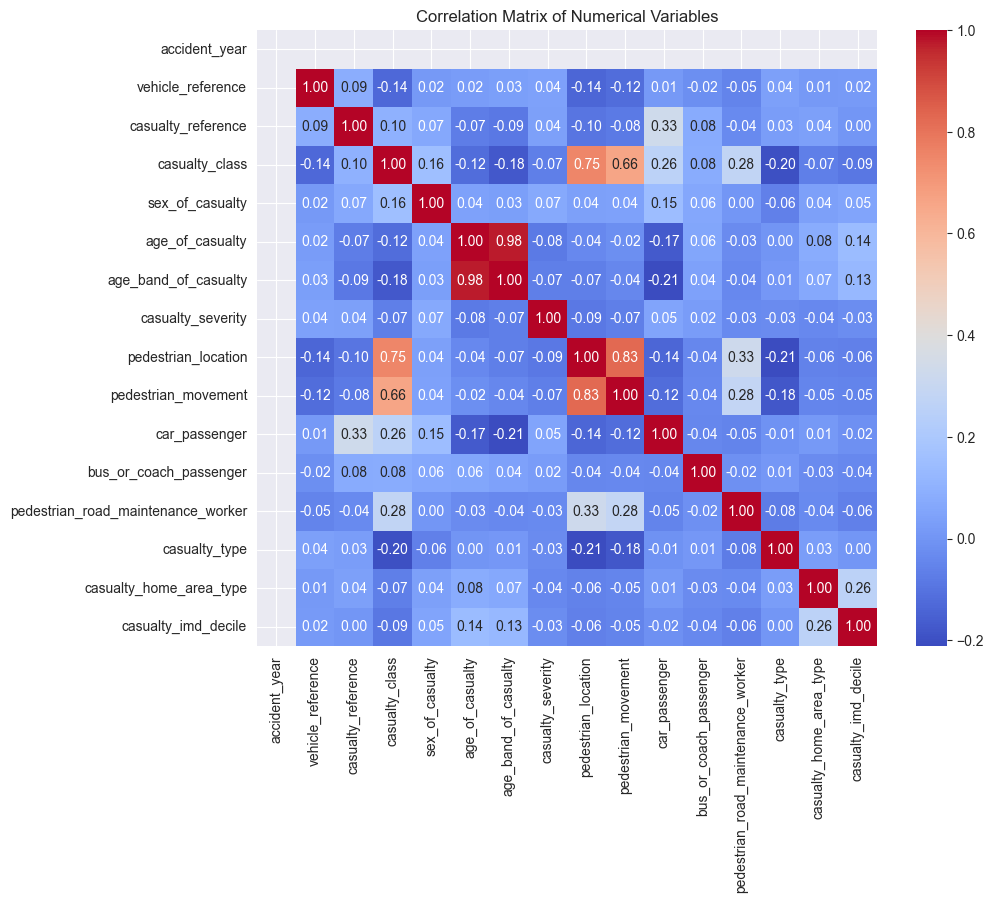

In [7]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Data Visualization

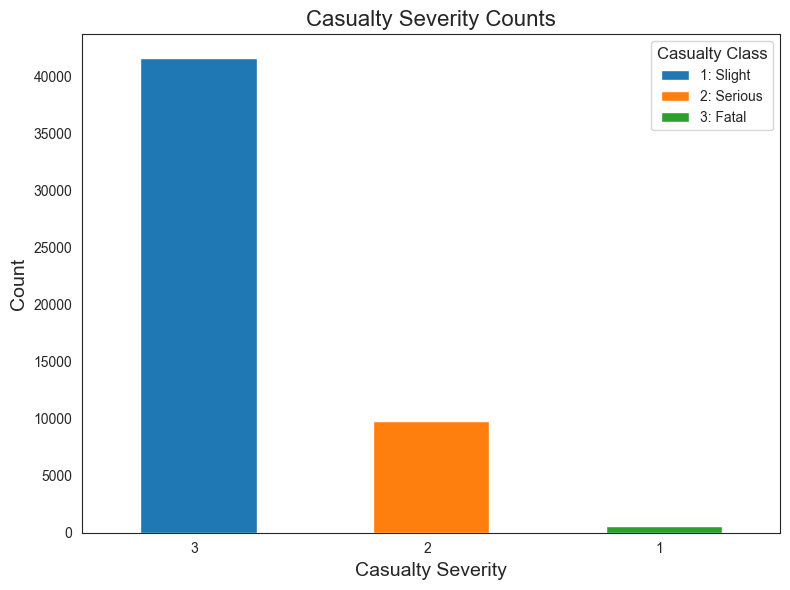

In [197]:
# Mapping between casualty severity code and label
severity_labels = {1: 'Slight', 2: 'Serious', 3: 'Fatal'}

# Set custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting
plt.figure(figsize=(8, 6))
casualty_severity_counts = df['casualty_severity'].value_counts()
bar_plot = casualty_severity_counts.plot(kind='bar', color=colors)
plt.title('Casualty Severity Counts', fontsize=16)
plt.xlabel('Casualty Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=360, ha='right')

# Adding legend with labels for each casualty severity
plt.legend(handles=bar_plot.patches, labels=[f"{key}: {value}" for key, value in severity_labels.items()], fontsize=10, title='Casualty Class', title_fontsize='12')

plt.tight_layout() 
plt.show()

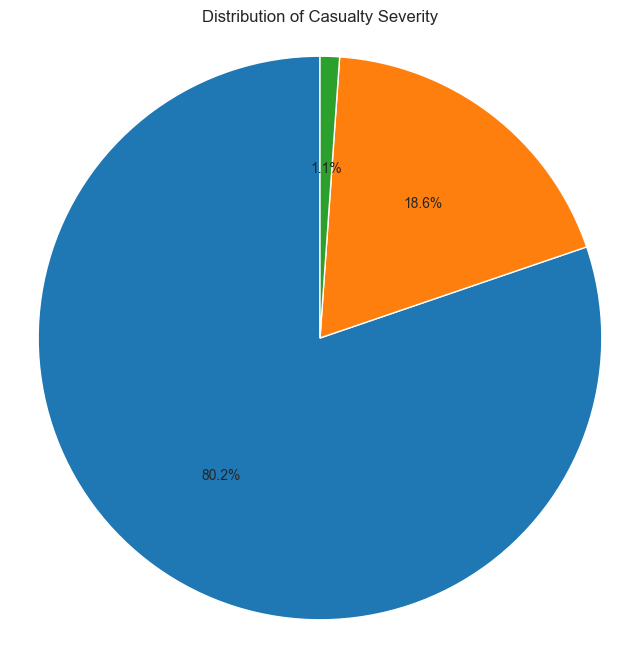

In [122]:
plt.figure(figsize=(8, 8))
plt.pie(df['casualty_severity'].value_counts(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Casualty Severity')
plt.axis('equal')
plt.show()

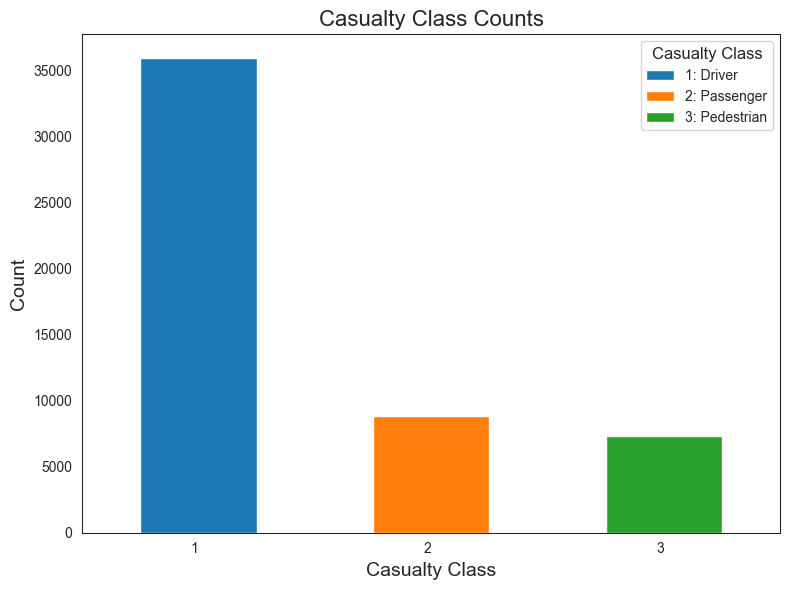

In [196]:
# Mapping between casualty class code and label
class_labels = {1: 'Driver', 2: 'Passenger', 3: 'Pedestrian'}

# Set custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting
plt.figure(figsize=(8, 6))
casualty_class_counts = df['casualty_class'].value_counts()
bar_plot = casualty_class_counts.plot(kind='bar', color=colors)
plt.title('Casualty Class Counts', fontsize=16)
plt.xlabel('Casualty Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=360, ha='right')

# Adding legend with labels for each casualty class
plt.legend(handles=bar_plot.patches, labels=[f"{key}: {value}" for key, value in class_labels.items()], fontsize=10, title='Casualty Class', title_fontsize='12')

plt.tight_layout()
plt.show()

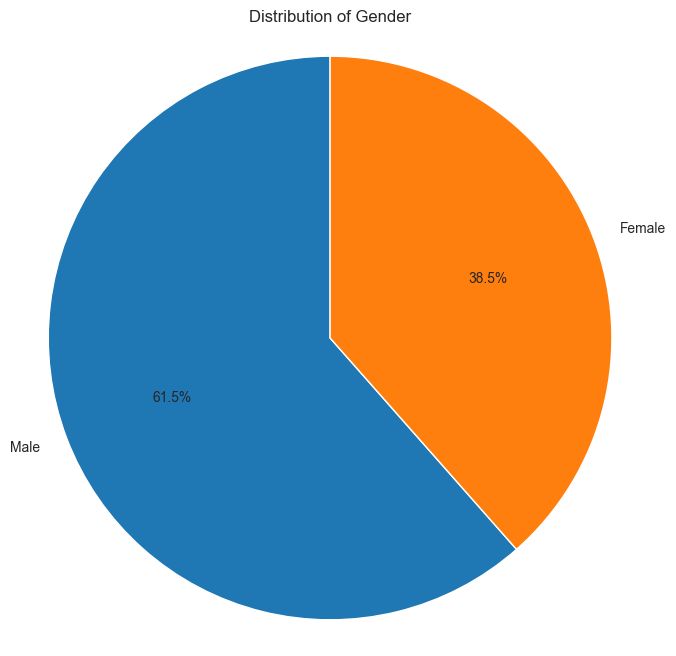

In [18]:
# Filter out unknown gender (value 9)
gender_counts = df['sex_of_casualty'].value_counts().drop(9.0)

# Define labels for the pie chart
labels = ['Male', 'Female']

# Define colors for each gender
colors = ['#1f77b4', '#ff7f0e']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

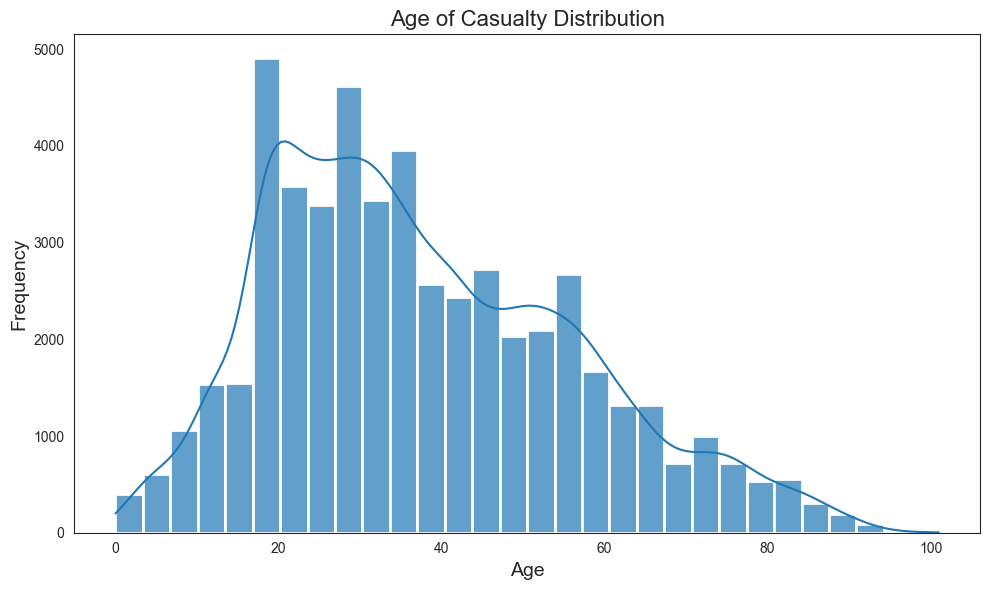

In [221]:
# Set style and color palette
sns.set_style("white")

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['age_of_casualty'], bins=30, kde=True, linewidth=2, alpha=0.7)
plt.title('Age of Casualty Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\NovinGostar\AppData\Local\Temp\ipykernel_23400\4235560037.py:20: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='age_band_of_casualty', data=df, palette=sns.color_palette(),hue='age_band_of_casualty', legend=False)


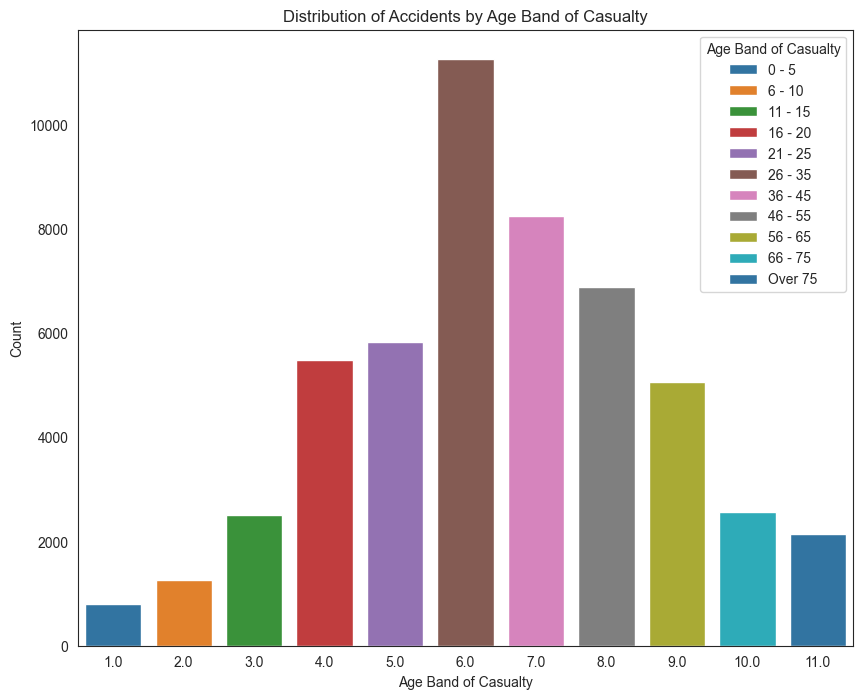

In [208]:
# Create a dictionary to map age bands codes to labels
age_band_legend_labels = {
    1: '0 - 5',
    2: '6 - 10',
    3: '11 - 15',
    4: '16 - 20',
    5: '21 - 25',
    6: '26 - 35',
    7: '36 - 45',
    8: '46 - 55',
    9: '56 - 65',
    10: '66 - 75',
    11: 'Over 75',
    -1: 'Data missing or out of range'
}

# Plot the distribution of accidents across age bands
sns.set_style("white")
plt.figure(figsize=(10, 8))
sns.countplot(x='age_band_of_casualty', data=df, palette=sns.color_palette(),hue='age_band_of_casualty', legend=False)
plt.title('Distribution of Accidents by Age Band of Casualty')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Count')
plt.legend(title='Age Band of Casualty', labels=[age_band_legend_labels[x] for x in range(1, 12)])
plt.show()


C:\Users\NovinGostar\AppData\Local\Temp\ipykernel_23400\371759296.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette=custom_palette, hue='casualty_severity', width=0.5, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, legend=False)


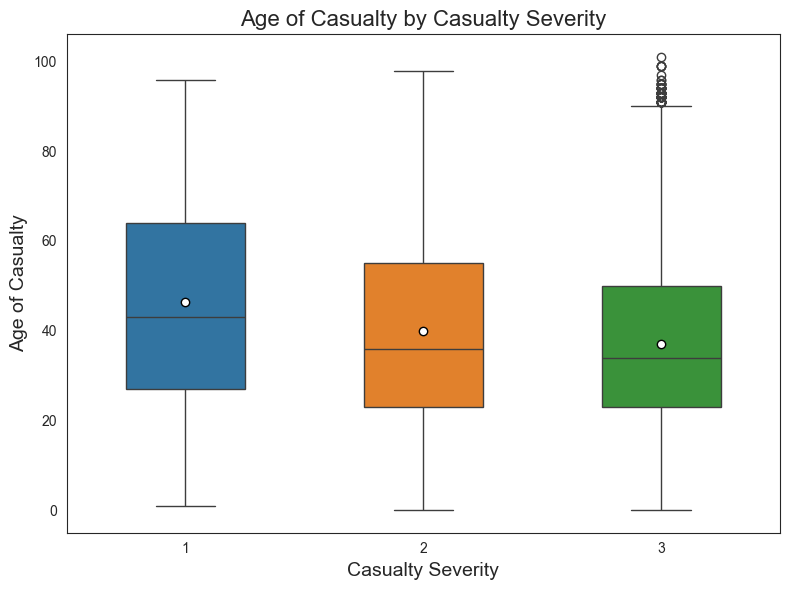

In [216]:
# Set style and color palette
sns.set_style("white")
custom_palette = sns.color_palette()

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette=custom_palette, hue='casualty_severity', width=0.5, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, legend=False)
plt.title('Age of Casualty by Casualty Severity', fontsize=16)
plt.xlabel('Casualty Severity', fontsize=14)
plt.ylabel('Age of Casualty', fontsize=14)
plt.tight_layout()
plt.show()


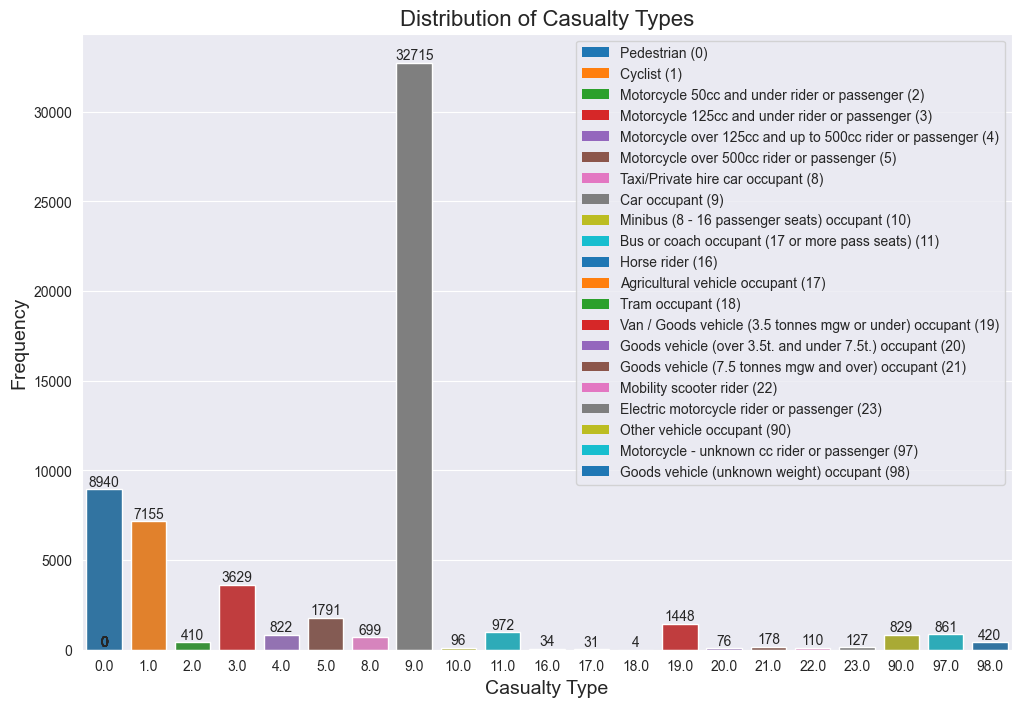

In [17]:
# Define colors for each casualty type
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4']

# Create a dictionary to map casualty type codes to labels
casualty_type_labels = {
    0: 'Pedestrian',
    1: 'Cyclist',
    2: 'Motorcycle 50cc and under rider or passenger',
    3: 'Motorcycle 125cc and under rider or passenger',
    4: 'Motorcycle over 125cc and up to 500cc rider or passenger',
    5: 'Motorcycle over 500cc rider or passenger',
    8: 'Taxi/Private hire car occupant',
    9: 'Car occupant',
    10: 'Minibus (8 - 16 passenger seats) occupant',
    11: 'Bus or coach occupant (17 or more pass seats)',
    16: 'Horse rider',
    17: 'Agricultural vehicle occupant',
    18: 'Tram occupant',
    19: 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
    20: 'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
    21: 'Goods vehicle (7.5 tonnes mgw and over) occupant',
    22: 'Mobility scooter rider',
    23: 'Electric motorcycle rider or passenger',
    90: 'Other vehicle occupant',
    97: 'Motorcycle - unknown cc rider or passenger',
    98: 'Goods vehicle (unknown weight) occupant',
    99: 'Unknown vehicle type (self rep only)',
    103: 'Motorcycle - Scooter (1979-1998)',
    104: 'Motorcycle (1979-1998)',
    105: 'Motorcycle - Combination (1979-1998)',
    106: 'Motorcycle over 125cc (1999-2004)',
    108: 'Taxi (excluding private hire cars) (1979-2004)',
    109: 'Car (including private hire cars) (1979-2004)',
    110: 'Minibus/Motor caravan (1979-1998)',
    113: 'Goods over 3.5 tonnes (1979-1998)',
    -1: 'Data missing or out of range'
}

# Get the counts for each casualty type in the data and sort by casualty type code
casualty_counts = df['casualty_type'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=casualty_counts.index, y=casualty_counts.values,
                   palette=colors, hue=casualty_counts.index, legend=True)

# Add labels to the bars
for bar in bars.patches:
    height = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20,
             f'{height}', ha='center', va='bottom')

plt.title('Distribution of Casualty Types', fontsize=16)
plt.xlabel('Casualty Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Create a custom legend with colored patches and labels
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in colors]
legend_labels = [f"{casualty_type_labels[index]} ({int(index)})" for index, count in casualty_counts.items()]
plt.legend(legend_patches, legend_labels, loc='upper right', fontsize=10)
plt.show()

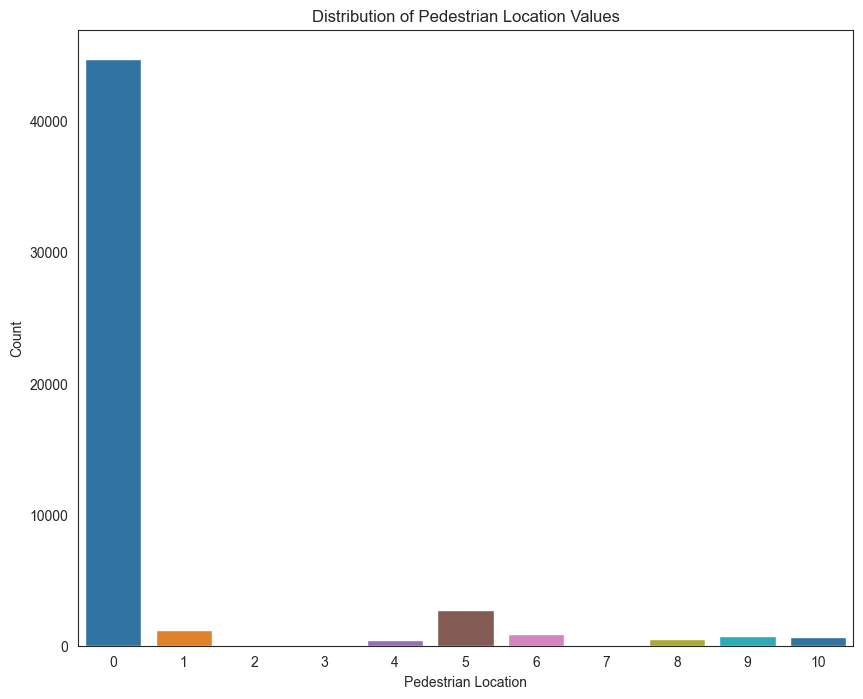

In [218]:
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#1f77b4']

# Plot the distribution of pedestrian location values
plt.figure(figsize=(10, 8))
sns.countplot(x='pedestrian_location', data=df, palette=colors, hue='pedestrian_location', legend=False)
plt.title('Distribution of Pedestrian Location Values')
plt.xlabel('Pedestrian Location')
plt.ylabel('Count')
plt.show()


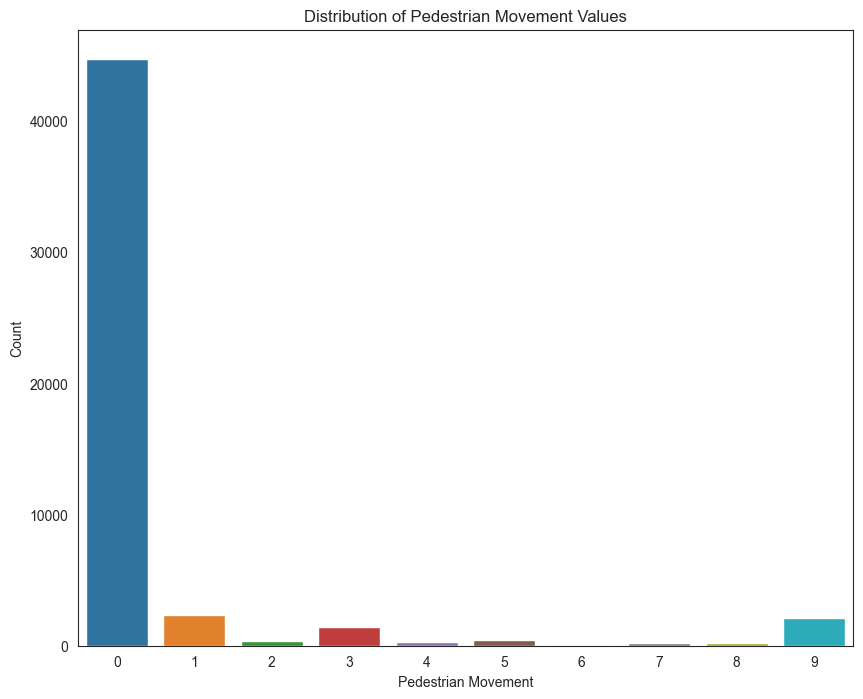

In [220]:
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the distribution of pedestrian movement values
plt.figure(figsize=(10, 8))
sns.countplot(x='pedestrian_movement', data=df, hue='pedestrian_movement', palette=colors, legend=False)
plt.title('Distribution of Pedestrian Movement Values')
plt.xlabel('Pedestrian Movement')
plt.ylabel('Count')
plt.show()

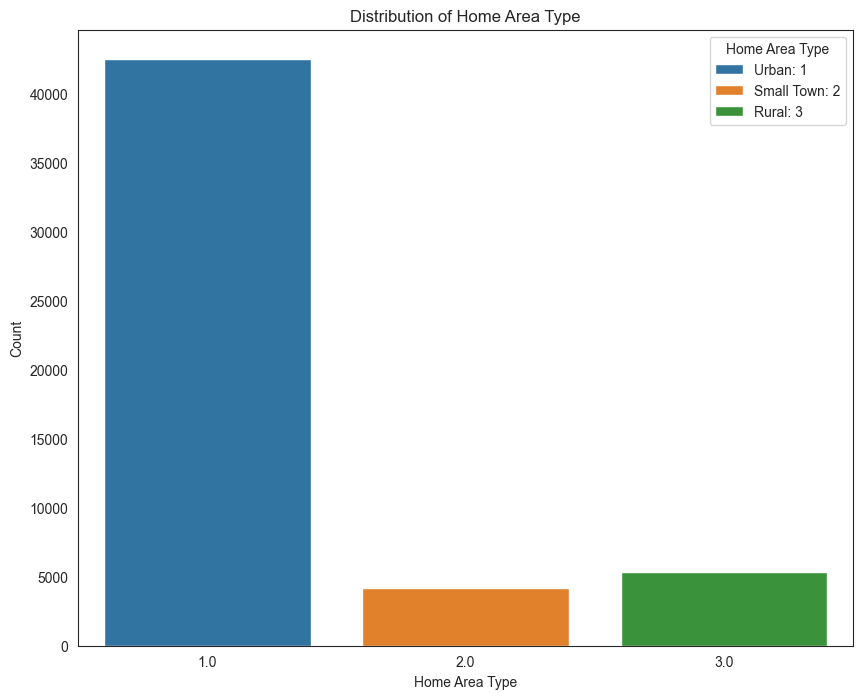

In [199]:
# Mapping between home area type code and label
area_type_labels = {'Urban': 1, 'Small Town': 2, 'Rural': 3}

# Set custom colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting
# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(x='casualty_home_area_type', data=df, palette=colors, hue='casualty_home_area_type', legend=False)
plt.title('Distribution of Home Area Type')
plt.xlabel('Home Area Type')
plt.ylabel('Count')

# Adding legend with labels for each home area type
plt.legend(title='Home Area Type', labels=[f"{key}: {value}" for key, value in area_type_labels.items()], loc='upper right', fontsize=10)

plt.show()


C:\Users\NovinGostar\AppData\Local\Temp\ipykernel_11508\1558029440.py:43: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='casualty_severity', hue='casualty_class', data=df, ax=axes[0], palette=custom_palette)
C:\Users\NovinGostar\AppData\Local\Temp\ipykernel_11508\1558029440.py:50: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df, ax=axes[1], palette=custom_palette)
C:\Users\NovinGostar\AppData\Local\Temp\ipykernel_11508\1558029440.py:57: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='casualty_severity', hue='age_band_of_casualty', data=df, legend="full", ax=axes[2], palette=custom_palette)
C:\Users\NovinGostar\AppData\Local\Temp\ipykernel_11508\1558029440.py:64: UserWarning: The palette list has more values

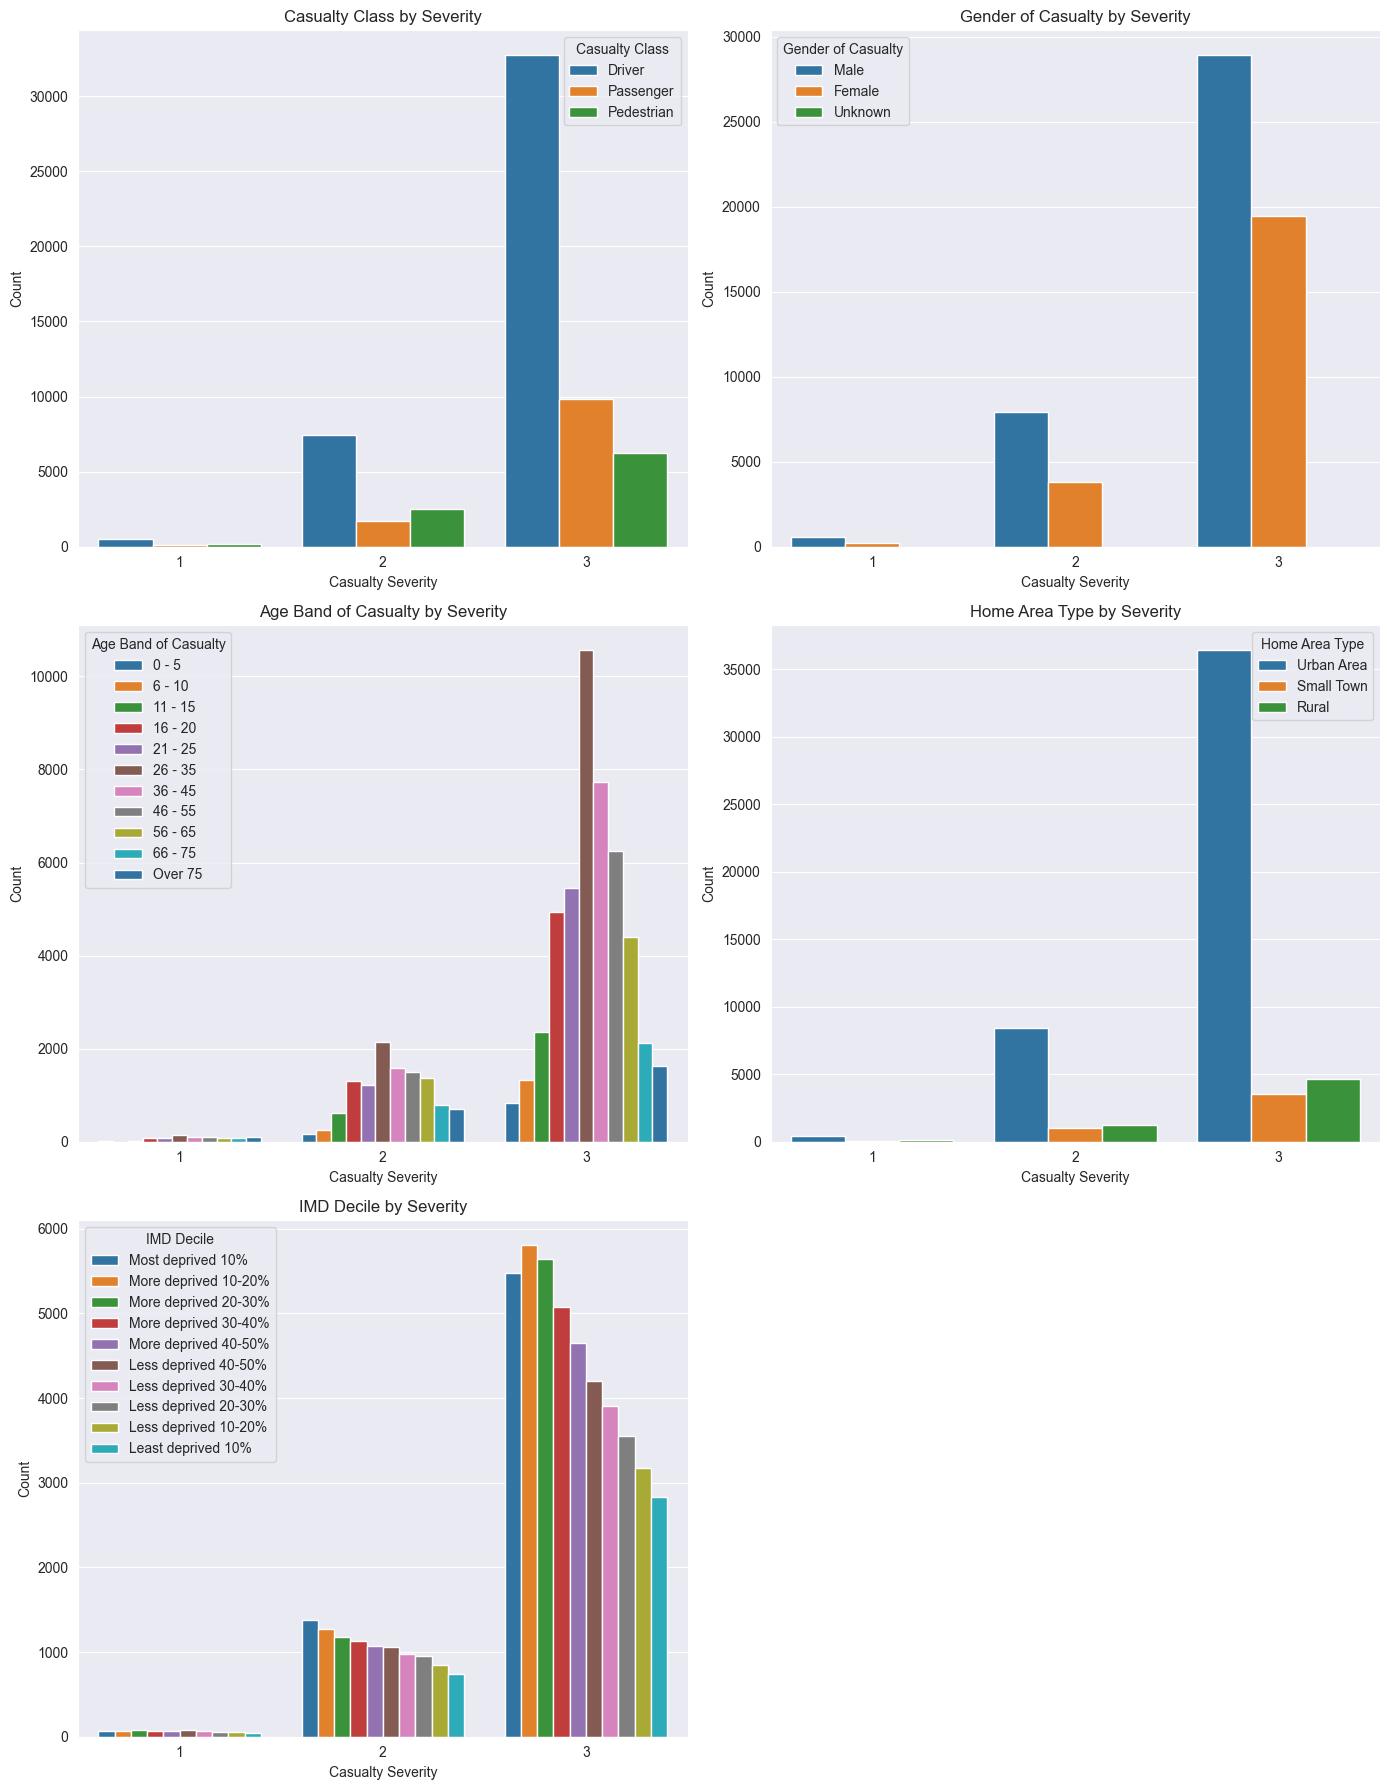

In [20]:
# Custom color palette
custom_palette = sns.color_palette()

# Set up the figure and axes, adjusting for 5 plots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()
axes[-1].remove() 

# Map numerical values to custom legend labels
imd_legend_labels = {
    1: 'Most deprived 10%',
    2: 'More deprived 10-20%',
    3: 'More deprived 20-30%',
    4: 'More deprived 30-40%',
    5: 'More deprived 40-50%',
    6: 'Less deprived 40-50%',
    7: 'Less deprived 30-40%',
    8: 'Less deprived 20-30%',
    9: 'Less deprived 10-20%',
    10: 'Least deprived 10%',
    -1: 'Data missing or out of range'
}

# Plot for casualty class
sns.countplot(x='casualty_severity', hue='casualty_class', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Casualty Class by Severity')
axes[0].set_xlabel('Casualty Severity')
axes[0].set_ylabel('Count')
axes[0].legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])

# Plot for sex of casualty
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Gender of Casualty by Severity')
axes[1].set_xlabel('Casualty Severity')
axes[1].set_ylabel('Count')
axes[1].legend(title='Gender of Casualty', labels=['Male', 'Female', 'Unknown'])

# Plot for age band of casualty
sns.countplot(x='casualty_severity', hue='age_band_of_casualty', data=df, legend="full", ax=axes[2], palette=custom_palette)
axes[2].set_title('Age Band of Casualty by Severity')
axes[2].set_xlabel('Casualty Severity')
axes[2].set_ylabel('Count')
axes[2].legend(title='Age Band of Casualty', labels=[age_band_legend_labels[x] for x in range(1, 12)])

# Plot for casualty home area type
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df, ax=axes[3], palette=custom_palette)
axes[3].set_title('Home Area Type by Severity')
axes[3].set_xlabel('Casualty Severity')
axes[3].set_ylabel('Count')
axes[3].legend(title='Home Area Type', labels=['Urban Area', 'Small Town', 'Rural'])

# Plot for casualty IMD decile
sns.countplot(x='casualty_severity', hue='casualty_imd_decile', data=df, legend="full", ax=axes[4], palette=custom_palette)
axes[4].set_title('IMD Decile by Severity')
axes[4].set_xlabel('Casualty Severity')
axes[4].set_ylabel('Count')
axes[4].legend(title='IMD Decile', labels=[imd_legend_labels[x] for x in range(1, 11)])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Preprocessing

## Impute missing values

In [245]:
df['sex_of_casualty'] = df['sex_of_casualty'].fillna(df['sex_of_casualty'].mode()[0])
df['pedestrian_road_maintenance_worker'] = df['pedestrian_road_maintenance_worker'].fillna(df['pedestrian_road_maintenance_worker'].mode()[0])
df['casualty_home_area_type'] = df['casualty_home_area_type'].fillna(df['casualty_home_area_type'].mode()[0])
df['casualty_imd_decile'] = df['casualty_imd_decile'].fillna(df['casualty_imd_decile'].mode()[0])


In [246]:
median_age = df['age_of_casualty'].median()

# Fill missing values in 'age_band_of_casualty' column with the calculated median age
df['age_of_casualty'] = df['age_of_casualty'].fillna(median_age)

# Determine the corresponding age band
age_bands = {
    (0, 5): 1,
    (6, 10): 2,
    (11, 15): 3,
    (16, 20): 4,
    (21, 25): 5,
    (26, 35): 6,
    (36, 45): 7,
    (46, 55): 8,
    (56, 65): 9,
    (66, 75): 10,
    (76, float('inf')): 11
}

# Find the corresponding age band for the median age
for (lower, upper), band in age_bands.items():
    if median_age <= upper:
        age_band_median = band
        break

# Fill missing values in 'age_band_of_casualty' column with the calculated median age band
df['age_band_of_casualty'] = df['age_band_of_casualty'].fillna(age_band_median)

For handling missing value in the 'car_passenger' column we should also consider context provided by the 'casualty_class' column. 0 in 'car_passenger' indicates not a car passenger, but if 'casualty_class' is equal to 2 it means that casualty was a passenger. 

So we conditionally set missing 'car_passenger' values to the mode value for 'car_passenger' excluding 0 where 'casualty_class' is equal to 2, implying the casualty was a car passenger. Finally, any remaining missing values in 'car_passenger' are filled with the overall mode value (including 0).

In [247]:
# Calculate mode value excluding 0
mode_excluding_zero = df[df['car_passenger'] != 0]['car_passenger'].mode()[0]

# Conditionally set missing 'car_passenger' values to
# mode without considering 0 where 'casualty_class' is equal to 2
df.loc[(df['car_passenger'].isnull()) & (df['casualty_class'] == 2),'car_passenger'] = mode_excluding_zero

# Fill missing values in 'car_passenger' column with mode value (excluding 0)
df['car_passenger'] = df['car_passenger'].fillna(df['car_passenger'].mode())

For handling missing value in the 'casualty_type' column we should also consider context provided by the 'casualty_class' column. 3 in 'casualty_class' indicates pedestrian, so 'casualty_type' should be pedestrian which is 0. 

So we conditionally set missing 'casualty_type' values to 0 for 'car_passenger' where 'casualty_class' is equal to 3, representing pedestrian casualties. Finally, it sets any remaining missing 'casualty_type' values to the mode value (excluding 0) where 'casualty_class' is not equal to 3, ensuring that missing values are filled appropriately based on the provided context.

In [248]:
# Calculate mode value excluding 0
mode_excluding_zero = df[df['casualty_type'] != 0]['casualty_type'].mode()[0]

# Conditionally set missing 'casualty_type' values to 0 where 'casualty_class' is equal to 3
df.loc[(df['casualty_type'].isnull()) & (df['casualty_class'] == 3), 'casualty_type'] = 0

# Fill missing values in 'casualty_type' column with mode value (excluding 0)
df['casualty_type'] = df['casualty_type'].fillna(mode_excluding_zero)

In [249]:
# Calculate mode value excluding 0
mode_excluding_zero = df[df['bus_or_coach_passenger'] != 0]['bus_or_coach_passenger'].mode()[0]

# Conditionally set missing 'bus_or_coach_passenger' values
# If casualty_type is equal to 10 or 11, set to mode excluding 0
# Otherwise, set to 0 (original mode)
df.loc[(df['bus_or_coach_passenger'].isnull()) & ((df['casualty_type'] == 10) | (df['casualty_type'] == 11)), 'bus_or_coach_passenger'] = mode_excluding_zero

df['bus_or_coach_passenger'] = df['bus_or_coach_passenger'].fillna(df['bus_or_coach_passenger'].mode()[0])

In [234]:
# df = df.drop('lsoa_of_casualty', axis=1)
# 
# print(df.shape)
# df.dropna(inplace=True)
# print(df.shape)

(61352, 19)
(54287, 19)


## Remove Outlier

In [228]:
df['vehicle_reference'].value_counts()

vehicle_reference
1      30585
2      19996
3       1186
4        189
5         60
6         16
7          6
8          4
9          2
227        1
61         1
Name: count, dtype: int64

In [250]:
# Remove outliers from the 'vehicle_reference' column
df = df[(df['vehicle_reference'] != 227) & (df['vehicle_reference'] != 61)]

## Feature Selection

status and accident_year columns only have one value, so we don't consider them in model.

age and age_band has high correlation, so we only keep one of them.

In [251]:
# Define features (X) and target variable (y)
X_df = df[['vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty',
           'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
           'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']]

y = df['casualty_severity']

## Normalization

In [252]:
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

In [253]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

## Logistic Regression

In [254]:
# Instantiate the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = log_reg.predict(X_test)

## Evaluation

Result of Model with Imputing Missing Values

In [255]:
accuracy_log = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_log)
mse_log = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_log)
mae_log = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_log)

Accuracy: 0.7995925020374898
Mean Squared Error: 0.2436837815810921
Mean Absolute Error: 0.21483292583537084


Result of Model with Dropping Rows with Missing Values

In [240]:
accuracy_log = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_log)
mse_log = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_log)
mae_log = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_log)

Accuracy: 0.7955236253108594
Mean Squared Error: 0.2376347057198121
Mean Absolute Error: 0.21552915169936446


## Feature Importance

<Axes: ylabel='Feature'>

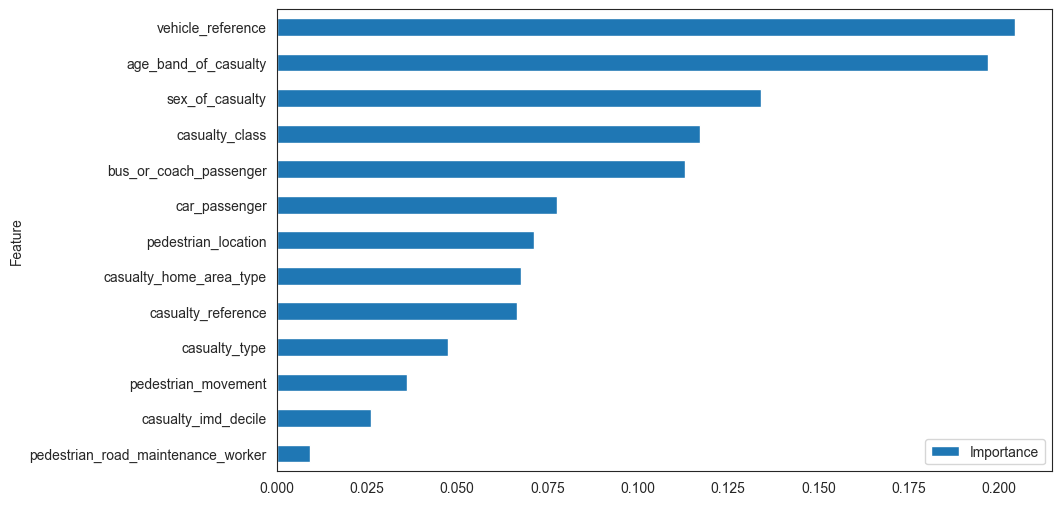

In [256]:
coefficients = log_reg.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_df.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [257]:
feature_importance

,Feature,Importance
9,pedestrian_road_maintenance_worker,0.009168
12,casualty_imd_decile,0.026254
6,pedestrian_movement,0.036160
10,casualty_type,0.047513
1,casualty_reference,0.066649
11,casualty_home_area_type,0.067617
5,pedestrian_location,0.071159
7,car_passenger,0.077606
8,bus_or_coach_passenger,0.113102
2,casualty_class,0.117265
